# **HANDLING IMBALANCED DATASETS**

In [1]:
# TECHNIQUES:
# 1. UnderSampling Majority class
# 2. OverSampling Minority class by duplication
# 3. OverSampling Minority class by SMOTE
# 4. Ensemble
# 5. Focal Loss

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("/content/customer_churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3572,1730-ZMAME,Female,1,No,No,32,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.50,2665,No
6857,1930-WNXSB,Male,0,Yes,Yes,58,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,92.85,5305.05,No
6233,6394-HHHZM,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.70,57.5,No
5829,6933-VLYFX,Male,0,Yes,Yes,31,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,59.95,1848.8,No
4323,3707-LRWZD,Female,0,No,No,32,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,One year,No,Electronic check,84.05,2781.85,Yes


In [5]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
517400/df.shape[0]

73.46301292063042

In [7]:
df.drop('customerID',axis='columns',inplace=True)

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [10]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
df.shape

(7043, 20)

In [13]:
df.iloc[488].TotalCharges

' '

In [14]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [15]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [16]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [17]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [18]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [19]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


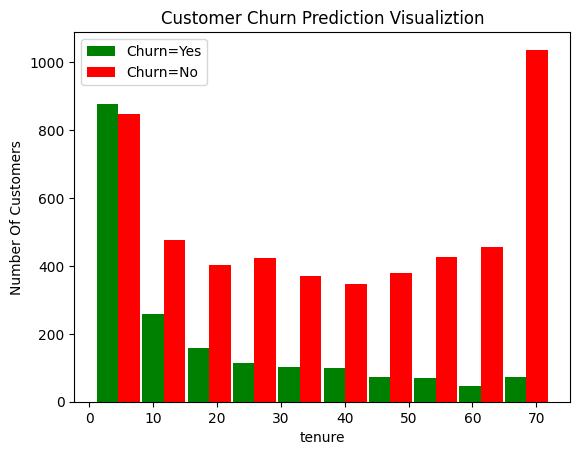

In [20]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

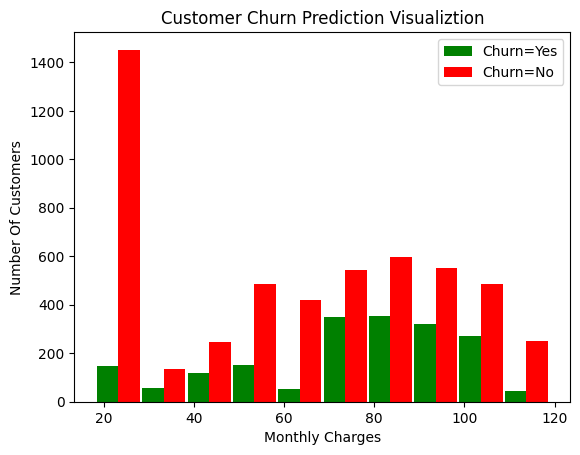

In [21]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [22]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [23]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [24]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [25]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [26]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [27]:
df1.gender.unique()

array([1, 0])

In [28]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2175,1,0,0,0,30,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4838,1,0,1,0,67,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
5467,1,0,0,0,53,1,1,1,1,1,...,0,1,0,0,1,0,0,0,0,1
6589,1,0,1,0,68,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6046,1,0,0,0,9,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [30]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [31]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [32]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [33]:
X = df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [34]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

In [35]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [36]:
y_test.value_counts()

0.0    1033
1.0     374
Name: Churn, dtype: int64

In [37]:
X_train.shape

(5625, 26)

In [38]:
X_test.shape

(1407, 26)

In [39]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
684,1,0,0,0,0.000000,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2446,1,0,0,0,0.239437,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2220,0,0,1,0,1.000000,1,0,1,1,0,...,1,0,0,0,0,1,1,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
5131,1,0,1,0,0.605634,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4372,0,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,0
4687,0,0,1,0,0.295775,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
2385,1,0,0,1,0.028169,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
6773,0,1,1,0,0.507042,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [40]:
len(X_train.columns)

26

In [41]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 8.9 MB/s eta 0:00:00


In [42]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report
from tensorflow_addons import losses

In [43]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])

    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds

In [44]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 7s 5ms/step - loss: 0.5401 - accuracy: 0.6981
Epoch 2/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4327 - accuracy: 0.7918
Epoch 3/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4229 - accuracy: 0.7979
Epoch 4/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4189 - accuracy: 0.8002
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4155 - accuracy: 0.8004
Epoch 6/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4127 - accuracy: 0.8053
Epoch 7/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4126 - accuracy: 0.8060
Epoch 8/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4108 - accuracy: 0.8073
Epoch 9/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4096 - accuracy: 0.8053
Epoch 10/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4084 - accura

METHOD1: UNDERSAMPLING

In [45]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [46]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [47]:
#PREPARE THE DATASET, DROPPING THE LABELS COLUMN AND SPLIT TEST-TRAIN
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [48]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [49]:
#DO PREDICTION
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.5751 - accuracy: 0.7177
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4958 - accuracy: 0.7669
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4834 - accuracy: 0.7686
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4778 - accuracy: 0.7696
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4729 - accuracy: 0.7753
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4705 - accuracy: 0.7753
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4685 - accuracy: 0.7736
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4661 - accuracy: 0.7749
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4647 - accuracy: 0.7789
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4625 - accuracy: 0.7816
Epoch 11/

METHOD2: OVERSAMPLING BY DUPLICATION

In [50]:
count_class_0, count_class_1

(5163, 1869)

In [51]:
#class 1 has 1869 samples. so this below line makes 2000 samples by adding 231 random samples
df_class_1.sample(2000, replace=True).shape

(2000, 27)

In [52]:
#class0 has more sample, so use it to oversample class1
# Oversample 1-class and concat the DataFrames of both class
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [53]:
#PREPARE THE DATASET, DROPPING THE LABELS COLUMN AND SPLIT TEST-TRAIN
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [54]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [55]:
#DO PREDICTION
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 3s 4ms/step - loss: 0.5521 - accuracy: 0.7331
Epoch 2/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4873 - accuracy: 0.7686
Epoch 3/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4807 - accuracy: 0.7689
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4763 - accuracy: 0.7703
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4716 - accuracy: 0.7720
Epoch 6/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4679 - accuracy: 0.7725
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4658 - accuracy: 0.7754
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4631 - accuracy: 0.7771
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4609 - accuracy: 0.7785
Epoch 10/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4588 - accura

METHOD3: SMOTE

In [56]:
# SMOTE use K-nearest neighbours and creates new sample out of current samples.
!pip install imbalanced-learn

In [57]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [58]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [59]:
#TRAIN-TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [60]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [61]:
# Number of classes in tEST Data
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [62]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5248 - accuracy: 0.7499
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4677 - accuracy: 0.7786
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4594 - accuracy: 0.7831
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4539 - accuracy: 0.7833
Epoch 5/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4495 - accuracy: 0.7877
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4450 - accuracy: 0.7900
Epoch 7/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4417 - accuracy: 0.7932
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4388 - accuracy: 0.7964
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4360 - accuracy: 0.7941
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4329 - accura

ENSEMBLE WITH UNDERSAMPLING

In [63]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [64]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [65]:
#PERFORM  TRAIN-TEST SPLIT

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [66]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [67]:
y_test.value_counts()

0    1033
1     374
Name: Churn, dtype: int64

In [68]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [69]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [70]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [71]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [72]:
#PERFORM 3 TIMES TO CREATE BATCH . SO INSTEAD DO THE FOLLWOING CELL
#example to create a batch

# df_train = pd.concat([df3_class0[:1495], df3_class1], axis=0)
# df_train.shape

In [73]:
#create 3 batches
#batch1 : 1495 samples
#batch2 : 1495 samples
#batch3 : 1140 samples
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [74]:
#split dataset into 3 batches and train individually

In [75]:
#BATCH1
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 5ms/step - loss: 0.6329 - accuracy: 0.6525
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 0.5268 - accuracy: 0.7428
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5047 - accuracy: 0.7532
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4954 - accuracy: 0.7592
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4898 - accuracy: 0.7656
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4859 - accuracy: 0.7645
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4841 - accuracy: 0.7659
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7702
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4794 - accuracy: 0.7722
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.7709
Epoch 11/

In [76]:
#BATCH2

X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 0.6160 - accuracy: 0.6883
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5146 - accuracy: 0.7579
Epoch 3/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4998 - accuracy: 0.7559
Epoch 4/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4929 - accuracy: 0.7589
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4894 - accuracy: 0.7639
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4848 - accuracy: 0.7656
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4813 - accuracy: 0.7699
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4790 - accuracy: 0.7662
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.7682
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4744 - accuracy: 0.7669
Epoch 11/

In [79]:
#BATCH3

X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 3ms/step - loss: 0.5852 - accuracy: 0.7154
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5080 - accuracy: 0.7522
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4943 - accuracy: 0.7639
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.7656
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4870 - accuracy: 0.7615
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4833 - accuracy: 0.7692
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4804 - accuracy: 0.7699
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.7692
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4768 - accuracy: 0.7689
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4758 - accuracy: 0.7712
Epoch 11/

In [80]:
#FINDING MAJORITY VOTE OF THE 3

#ANYTHING MORE THAN 1, 1
#ELSE, 0

y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [81]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1033
           1       0.49      0.76      0.59       374

    accuracy                           0.72      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.72      0.74      1407

